## 비지도학습 - 이상치 탐지 (신용카드)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('../data/creditcard.csv')
data.head()

# V1, V2...: 신용카드 거래 내역들인데 보안상의 이유로 차원축소(PCA)를 하여 컬럼의 의미를 해석할 수 없다

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


추가 설명) https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud <br>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.

In [5]:
data.describe()

# Amount: 거래 금액
# Class: 타겟변수(비지도학습을 위해 삭제해야함)
# Class의 평균값이 0.001인것으로 보아 불균형이 심한 데이터셋임을 알 수 있다.(0, 1로만 구성된 컬럼이기 때문에)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class 컬럼의 불균형에 대한 추가 설명) (kaggle) <br>
Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [3]:
# Class의 개수
data['Class'].value_counts()

# 492 개의 사기거래가 발생함

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Scaling
# 타켓변수 'Class' 삭제
# Scaling
data_X = data.copy().drop('Class', axis=1)
data_y = data['Class'].copy()

In [10]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler() # mean 값을 뺀 것으로 마이너스 값이 존재한다.
data_X.loc[:,:] = s_scaler.fit_transform(data_X)  # 모든 행과 열에 대해서 스케일링을 함
data_X.shape

(284807, 30)

추가 설명) <br> Min-Max Scaler와 Standard Scaler
Min-Max Scaler: 가장 작은 것을 0, 가장 큰 것을 1로 두고 0-1 사이로 스케이링(정규화) <br>
Standard Scaler: 특성들의 평균을 0, 분산을 1 로 스케일링하는 것. (각 컬럼을 평균으로 빼서 표준편차로 나눠줌) (표준화) => 이상치에 매우 민감하기 때문에 현재 데이터셋에 알맞은 방법이다. (Amount 컬럼에서 max값이 매우 큰 것과 같은 이상치가 있기 때문에)

In [11]:
data_X.describe()['Time']

count    2.848070e+05
mean    -3.065637e-16
std      1.000002e+00
min     -1.996583e+00
25%     -8.552120e-01
50%     -2.131453e-01
75%      9.372174e-01
max      1.642058e+00
Name: Time, dtype: float64

In [12]:
data_X.describe()['Amount']

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

In [13]:
# train set, test set split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.33, 
                                                    random_state=2018, stratify=data_y)
# stratify: 1이 적기 때문에 그 비율을 맞춰주기 위해 원래 data_y의 비율로 맞춰준다 

In [14]:
# stratify한 결과 보기
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 비율이 같은 것을 알 수 있다.

((190820, 30), (93987, 30), (190820,), (93987,))

In [15]:
y_train.mean(), y_test.mean()

(0.0017293784718582959, 0.0017236426314277506)

### 지도학습

> Logistic Regression 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train) # 학습 

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.85      0.69      0.76       162

    accuracy                           1.00     93987
   macro avg       0.93      0.85      0.88     93987
weighted avg       1.00      1.00      1.00     93987



> Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, max_depth=2) # n_jobs=-1 컴퓨터 cpu 성능 향상
rf.fit(X_train, y_train) # 학습 

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.84      0.58      0.69       162

    accuracy                           1.00     93987
   macro avg       0.92      0.79      0.84     93987
weighted avg       1.00      1.00      1.00     93987



> KNN_5 (2분 소요) predict, predict_proba 결과 미리 저장

In [32]:
from sklearn.neighbors import KNeighborsClassifier 

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train) # 학습 

y_pred = knn_5.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.92      0.79      0.85       162

    accuracy                           1.00     93987
   macro avg       0.96      0.90      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [33]:
y_pred_proba_knn5 = knn_5.predict_proba(X_test)
y_pred_proba_knn5.shape

(93987, 2)

- Precision-Recall Curve, Average Precision

Text(0, 0.5, 'Precision')

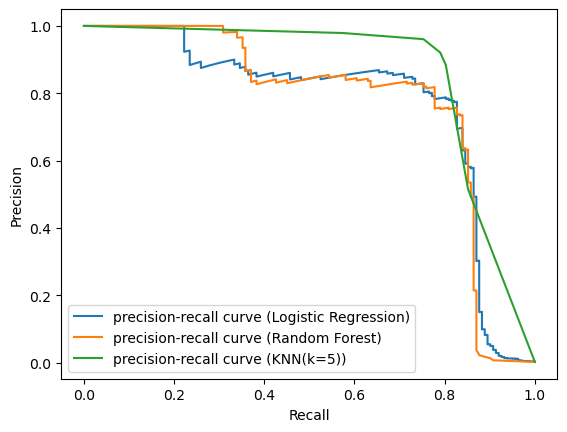

In [34]:
precision, recall, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(recall, precision, label='precision-recall curve (Logistic Regression)') # X축: Recall, Y축: Precision

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(recall_rf, precision_rf, label='precision-recall curve (Random Forest)')

# 이미 예측한 predict_proba 활용(다시 계산 X)
precision_knn5, recall_knn5, thresholds_knn5 = precision_recall_curve(y_test, y_pred_proba_knn5[:,1]) 
plt.plot(recall_knn5, precision_knn5, label='precision-recall curve (KNN(k=5))')

plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')

- Average Precision: AP가 높을 수록 좋은 성능의 모델이다.

In [40]:
# Average Precision 계산 (이해만 하기)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html 참고
np.sum((recall[::-1][1:] - recall[::-1][:-1]) * precision[::-1][1:])

0.7709756449173383

In [35]:
# Logistic Regression에 대한 Average Precision 점수
average_precision_score(y_test, logreg.predict_proba(X_test)[:,1])

0.7709756449173383

In [36]:
# Random Forest에 대한 Average Precision 점수
average_precision_score(y_test, rf.predict_proba(X_test)[:,1])

0.7706785787729332

In [37]:
# KNN(k=5) 대한 Average Precision 점수
average_precision_score(y_test, y_pred_proba_knn5[:,1])

0.8046606835001885

- ROC와 AUC 계산

Text(0, 0.5, 'TPR (True Positive Rate)')

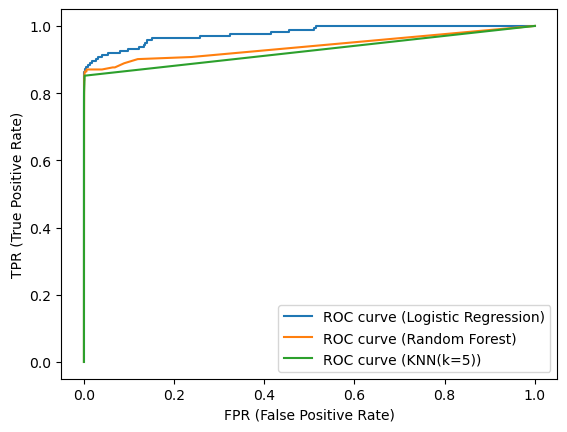

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve (Logistic Regression)')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='ROC curve (Random Forest)')

fpr_knn5, tpr_knn5, thresholds_knn5 = roc_curve(y_test, y_pred_proba_knn5[:,1])
plt.plot(fpr_knn5, tpr_knn5, label='ROC curve (KNN(k=5))')

plt.legend()
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')

In [42]:
# Logistic Regression AUC => 제일 좋다
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.9780947587608925

In [43]:
# Random Forest AUC
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.9388373416493144

In [44]:
# KNN에 대한 AUC
roc_auc_score(y_test, y_pred_proba_knn5[:,1])

0.9257668104199769

## 비지도 학습

In [45]:
def anomaly_score(original_df, reduced_df):
    loss = np.sum((np.array(original_df) - np.array(reduced_df)) ** 2, axis=1)
    loss = pd.Series(loss)
    loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
    return loss

- PCA 를 차원축소 -> 복원

In [46]:
X_train.shape

(190820, 30)

> n-component=30 (주성분의 개수를 원본 컬럼의 개수와 동일하게)

In [47]:
# 예측을 잘 못하는 케이스
# 현재 feature의 수가 30개 인데 PCA를 30개로 하면 성능이 좋지 않다는 것을 확인
# 주성분의 개수를 원본 컬럼 개수와 동일하게 > 주성분이 대부분의 정보를 기억하기 때문에 차원축소 후 복구를 해도 이상치를 찾아내기 어려움
from sklearn.decomposition import PCA

n_components = 30
pca = PCA(n_components=n_components, random_state=2018)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA.shape

(190820, 30)

In [48]:
# 다시 원래의 값으로 inverse
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)

In [49]:
def anomaly_score(original_df, reduced_df):
    loss = np.sum((np.array(original_df) - np.array(reduced_df)) ** 2, axis=1)
    loss = pd.Series(loss)
    loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
    return loss

In [57]:
# 원본과 복원본의 차이 (정규화된)
anomaly_proba = anomaly_score(X_train, X_train_PCA_inverse)
# 차이가 클수록 이상치로 탐지한다. -> 그 이상치를 사기거래로 판별한다.

In [59]:
anomaly_proba

0         0.000211
1         0.000031
2         0.000205
3         0.000144
4         0.000472
            ...   
190815    0.000114
190816    0.000045
190817    0.000118
190818    0.000157
190819    0.000857
Length: 190820, dtype: float64

Text(0, 0.5, 'Precision')

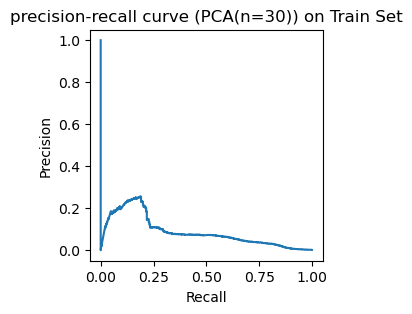

In [50]:
plt.figure(figsize=(3,3))
precision, recall, thresholds = precision_recall_curve(y_train, anomaly_proba)
plt.title('precision-recall curve (PCA(n=30)) on Train Set')
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

# 면적이 넓을 수록 좋은 건데, 그래프에서 안좋은 것을 알 수 있다.

Text(0, 0.5, 'TPR (True Positive Rate)')

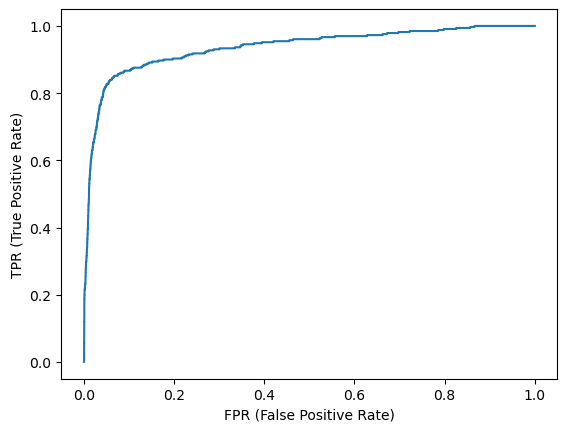

In [51]:
fpr, tpr, thresholds = roc_curve(y_train, anomaly_proba)
plt.plot(fpr, tpr, label='ROC curve (PCA(n=30)) on Train Set')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')

> PCA의 주성분의 개수: 27로 설정 -> Precision-Recall Curve, ROC Curve

In [56]:
n_components = 27
pca = PCA(n_components=n_components, random_state=2018)

X_train_PCA = pca.fit_transform(X_train)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
anomaly_proba = anomaly_score(X_train, X_train_PCA_inverse)

Text(0, 0.5, 'Precision')

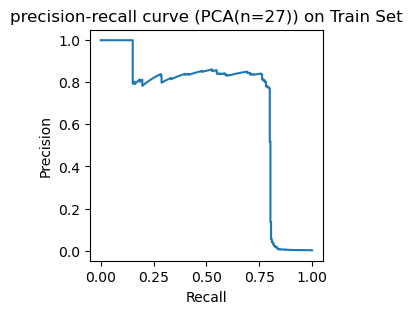

In [54]:
plt.figure(figsize=(3,3))
precision, recall, thresholds = precision_recall_curve(y_train, anomaly_proba)
plt.title('precision-recall curve (PCA(n=27)) on Train Set')
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [60]:
average_precision_score(y_train, anomaly_proba)

0.6937067887351662

Text(0, 0.5, 'TPR (True Positive Rate)')

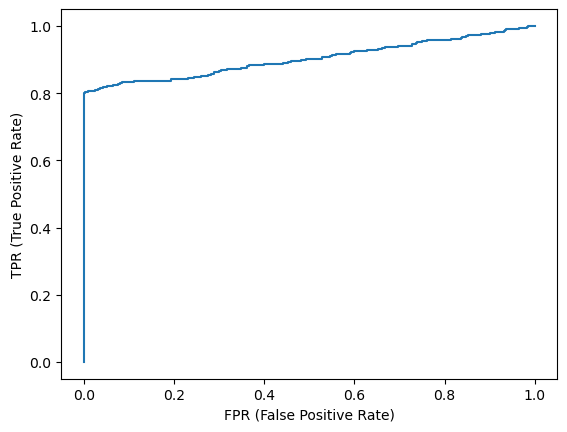

In [55]:
fpr, tpr, thresholds = roc_curve(y_train, anomaly_proba)
plt.plot(fpr, tpr, label='ROC curve (PCA(n=27)) on Train Set')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')

In [61]:
roc_auc_score(y_train, anomaly_proba)

0.902090493893738

> Test set에 적용 (n_components=27)
- Precision-Recall Curve, Average Precision Score, ROC Curve, AUC score

In [64]:
n_components = 27
pca = PCA(n_components=n_components, random_state=2018)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)

X_test_PCA = pca.transform(X_test)
X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
anomaly_proba = anomaly_score(X_test, X_test_PCA_inverse)

Text(0, 0.5, 'Precision')

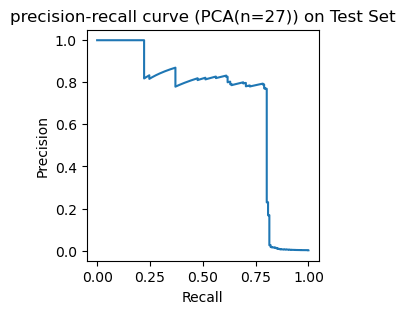

In [65]:
# precision-recall curv
plt.figure(figsize=(3,3))
precision, recall, thresholds = precision_recall_curve(y_test, anomaly_proba)
plt.title('precision-recall curve (PCA(n=27)) on Test Set')
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [66]:
# Average Precision Score
average_precision_score(y_test, anomaly_proba)

0.698094725274565

Text(0, 0.5, 'TPR (True Positive Rate)')

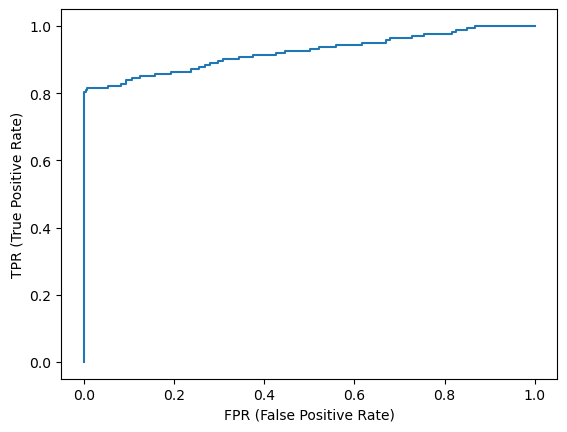

In [67]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, anomaly_proba)
plt.plot(fpr, tpr, label='ROC curve (PCA(n=27)) on Test Set')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')

In [68]:
# AUC score
roc_auc_score(y_test, anomaly_proba)

0.9224593329451665